In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
meta_df = pd.read_csv('../train_val_test_sgkf_Feb26_allFiles_sum1.csv', index_col=0)
meta_df

,file,source,category,weight,file_group,fold
0,../data/interim/youtube/NatureSoundscapes/6LpA...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/6LpAnfislTc,6
1,../data/interim/youtube/NomadicAmbience_nature...,nature_youtube/NomadicAmbience_nature,0,0.005714,youtube/NomadicAmbience_nature/wlCrnlQ5ofE,0
2,../data/interim/SONYC/audio-10/05_027168.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-10/05_027168.pkl,4
3,../data/interim/SONYC/audio-13/32_019485.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-13/32_019485.pkl,8
4,../data/interim/SONYC/audio-13/33_016321.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-13/33_016321.pkl,5
...,...,...,...,...,...,...
5677,"../data/interim/GoogleAudioSet/Outside, urban ...",city_GoogleAudioSet,1,0.005882,"../data/interim/GoogleAudioSet/Outside, urban ...",9
5678,../data/interim/youtube/NatureSoundscapes/gEqK...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/gEqKnRu15bI,2
5679,../data/interim/youtube/NatureSoundscapes/PFtx...,nature_youtube/NatureSoundscapes,0,0.000479,youtube/NatureSoundscapes/PFtxRv6GcFw,8
5680,../data/interim/SONYC/audio-17/03_001923.pkl,city_SONYC,1,0.000433,../data/interim/SONYC/audio-17/03_001923.pkl,8


In [3]:
def load_df_pkl(filename, indices):
    import pickle
    # open a file, where you stored the pickled data
    file = open(filename, 'rb')

    # dump information to that file
    output = pickle.load(file)
    df = output[indices]

    # close the file
    file.close()
    return df

In [4]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices'))


    
df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)

# df.loc[df['source'].str.contains('GoogleAudioSet'),'weight'] = df.loc[df['source'].str.contains('GoogleAudioSet'),'weight']/3

df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover,category,fold,source,weight
0,3168.3,-4.917383e-11,0.01,-0.038741,10.787897,73.020597,-10.896017,3.033336,0.285233,0.889860,...,37016.834367,0.990615,0.472085,1.495231,11,0.442122,0,6,nature_youtube/NatureSoundscapes,0.000479
1,3783.1,5.465001e-10,0.01,0.324149,33.784624,73.020601,-10.399343,1.977237,0.302018,0.802993,...,33267.856238,0.993769,0.461715,1.331546,27,2.633893,0,0,nature_youtube/NomadicAmbience_nature,0.005714
2,530.5,1.907349e-10,0.01,-0.000379,3.175302,73.020601,-13.041456,0.514603,0.222806,0.977961,...,2439.843419,0.878735,0.017234,1.220867,17,0.879848,1,4,city_SONYC,0.000433
3,374.6,6.139279e-10,0.01,-0.066683,2.703640,73.020597,-13.815996,0.538294,0.203798,0.978096,...,1994.414258,0.759264,0.019362,1.406525,8,0.528788,1,8,city_SONYC,0.000433
4,1087.4,-9.059906e-10,0.01,0.017096,2.939691,73.020597,-12.709298,0.335519,0.231492,0.977624,...,4914.901224,0.833037,0.119948,1.406073,41,6.454105,1,5,city_SONYC,0.000433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,1410.2,1.142919e-09,0.01,-0.012574,2.899899,73.020601,-11.393145,0.082236,0.269366,0.991767,...,10055.657141,0.946976,0.103472,1.284188,3,0.147583,1,9,city_GoogleAudioSet,0.005882
5678,540.6,-2.801418e-10,0.01,0.025844,3.292901,73.020601,-13.260077,0.605169,0.217268,0.976135,...,2395.371538,0.875839,0.012907,1.216855,4,1.195112,0,2,nature_youtube/NatureSoundscapes,0.000479
5679,5666.8,-7.987022e-10,0.01,0.023222,5.691379,73.020597,-11.640635,1.451397,0.261799,0.945991,...,44700.692220,0.992981,0.520530,1.713805,39,6.721639,0,8,nature_youtube/NatureSoundscapes,0.000479
5680,1297.4,-2.723932e-09,0.01,0.017762,3.133450,73.020601,-11.636633,0.474801,0.261920,0.982117,...,11274.696534,0.938413,0.119799,1.400830,3,0.261254,1,8,city_SONYC,0.000433


In [5]:
# check the weight
df.groupby(['source'])['weight'].sum()

source
city_GoogleAudioSet                      1.0
city_SONYC                               1.0
city_youtube/NomadicAmbience_city        1.0
nature_AmbisonicSoundLibrary             1.0
nature_GoogleAudioSet                    1.0
nature_S2L_LULC                          1.0
nature_youtube/NatureSoundscapes         1.0
nature_youtube/NomadicAmbience_nature    1.0
Name: weight, dtype: float64

In [6]:
## data preprocessing
def df_preproc(df):

    # replacing the inf values by NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    train_category = df[df['fold']<8]['category']
    val_category = df[df['fold']==8]['category']
    test_category = df[df['fold']==9]['category']

    train_source = df[df['fold']<8]['source']
    val_source = df[df['fold']==8]['source']
    test_source = df[df['fold']==9]['source']
    
    train_weight = df[df['fold']<8]['weight']
    val_weight = df[df['fold']==8]['weight']
    test_weight = df[df['fold']==9]['weight']

    train_df = df[df['fold']<8].drop(columns=['fold','category','source','weight'])
    val_df = df[df['fold']==8].drop(columns=['fold','category','source','weight'])
    test_df = df[df['fold']==9].drop(columns=['fold','category','source','weight'])

    # replace the nan by mean
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    transformer = Pipeline(steps=[
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
          ,('scaler', StandardScaler())
    ])

    transformer.fit(train_df)
    train_df = pd.DataFrame(transformer.transform(train_df), columns=train_df.columns)
    val_df = pd.DataFrame(transformer.transform(val_df), columns=val_df.columns)
    test_df = pd.DataFrame(transformer.transform(test_df), columns=test_df.columns)
    
    return train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight


In [7]:
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [8]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


2023-02-26 09:48:52.939853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


2023-02-26 09:48:59.279024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback,
                    sample_weight=train_weight)

Epoch 1/20
143/143 [==============================] - 1s 4ms/step - loss: 9.5914e-04 - accuracy: 0.7171 - val_loss: 0.4641 - val_accuracy: 0.8327
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 8.0256e-04 - accuracy: 0.7807 - val_loss: 0.4327 - val_accuracy: 0.8434
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 7.4842e-04 - accuracy: 0.7987 - val_loss: 0.3860 - val_accuracy: 0.8701
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 7.7125e-04 - accuracy: 0.8224 - val_loss: 0.3727 - val_accuracy: 0.8808
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 7.2462e-04 - accuracy: 0.8352 - val_loss: 0.3800 - val_accuracy: 0.8790
Epoch 6/20
143/143 [==============================] - 0s 2ms/step - loss: 7.3475e-04 - accuracy: 0.8306 - val_loss: 0.3597 - val_accuracy: 0.8808
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 7.1892e-04 - accuracy: 0.8446 - val_loss: 0.3480 -

In [10]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

18/18 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8741
Loss:  0.32748475670814514
Accuracy:  0.8741135001182556


In [11]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

18/18 [==============================] - 0s 1ms/step


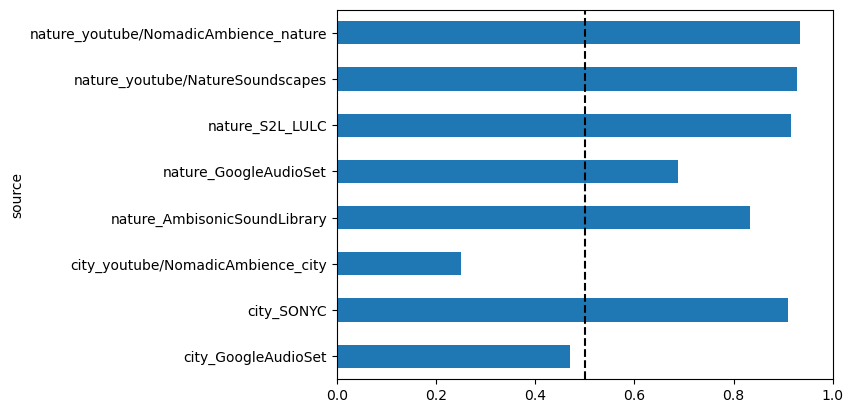

In [12]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Background indices

In [13]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_bg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source','weight']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source, train_weight = df_preproc(df)

In [14]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

Epoch 1/20
143/143 [==============================] - 1s 4ms/step - loss: 0.4489 - accuracy: 0.8082 - val_loss: 0.3100 - val_accuracy: 0.9039
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8586 - val_loss: 0.2726 - val_accuracy: 0.9110
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8679 - val_loss: 0.2505 - val_accuracy: 0.9146
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8723 - val_loss: 0.2568 - val_accuracy: 0.9110
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8723 - val_loss: 0.2419 - val_accuracy: 0.9075
Epoch 6/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8723 - val_loss: 0.2370 - val_accuracy: 0.9128
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8854 - val_loss: 0.2360 - val_accuracy: 0.9110
Epoch 

In [16]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

18/18 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8901
Loss:  0.28447866439819336
Accuracy:  0.890070915222168


In [17]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

18/18 [==============================] - 0s 1ms/step


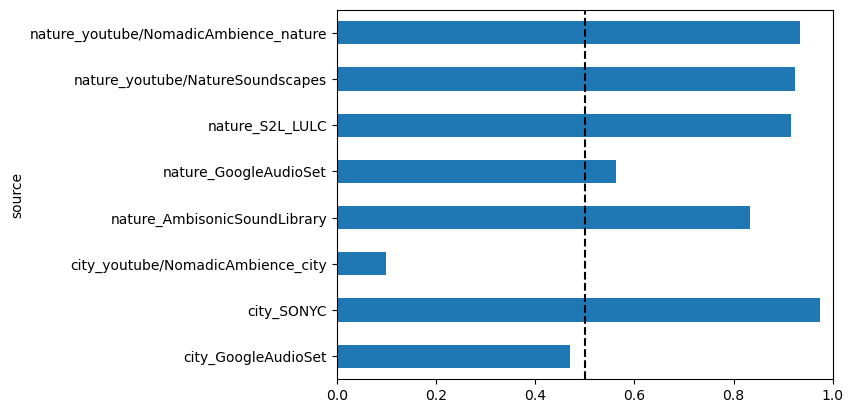

In [18]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()

# Foreground indices

In [19]:
df_list = []
for index, row in meta_df.iterrows():
    df_list.append(load_df_pkl(row['file'], indices='df_indices_fg'))

df = pd.concat(df_list, ignore_index=True)
df = pd.concat([df, meta_df[['category','fold','source']]], axis=1)
train_df, val_df, test_df, train_category, val_category, test_category, train_source, val_source, test_source = df_preproc(df)

KeyError: 'weight'

In [ ]:
# import the necessary packages
import tensorflow as tf
import random as python_random

tf.keras.backend.clear_session()
tf.random.set_seed(23)
np.random.seed(23)
python_random.seed(23)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(train_df.columns)), dtype=tf.float32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
], name='model')

model.summary()


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer="adam",
                    metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)


history = model.fit(x=train_df,
                    y=train_category,
                    epochs=20,
                    validation_data=(val_df, val_category),
                    callbacks=callback)

In [ ]:
loss, accuracy = model.evaluate(x=test_df, y=test_category)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

test_source_df = pd.DataFrame({'source':test_source, 'category':test_category, 'pred':model.predict(test_df).argmax(axis=1)})
acc_source = test_source_df.groupby(['source']).apply(lambda x: accuracy_score(x['category'], x['pred']))

In [ ]:
ax = acc_source.plot.barh()
ax.axvline(x=0.5, color='k', linestyle='--')
ax.set_xlim(0,1)
plt.show()